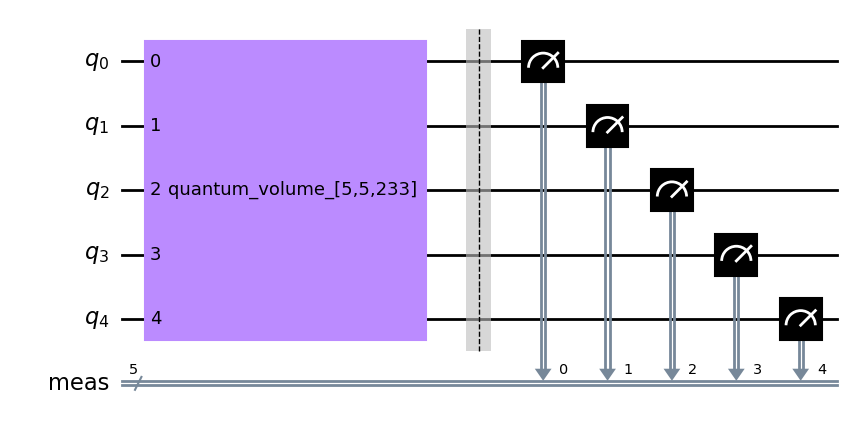

In [2]:
import qiskit
 
# Qiskit quantum circuits libraries
quantum_circuit = qiskit.circuit.library.QuantumVolume(5)
quantum_circuit.measure_all()
quantum_circuit.draw(output="mpl")

configrc.store_credentials:WARNING:2023-01-06 13:15:15,521: Credentials already present. Set overwrite=True to overwrite.


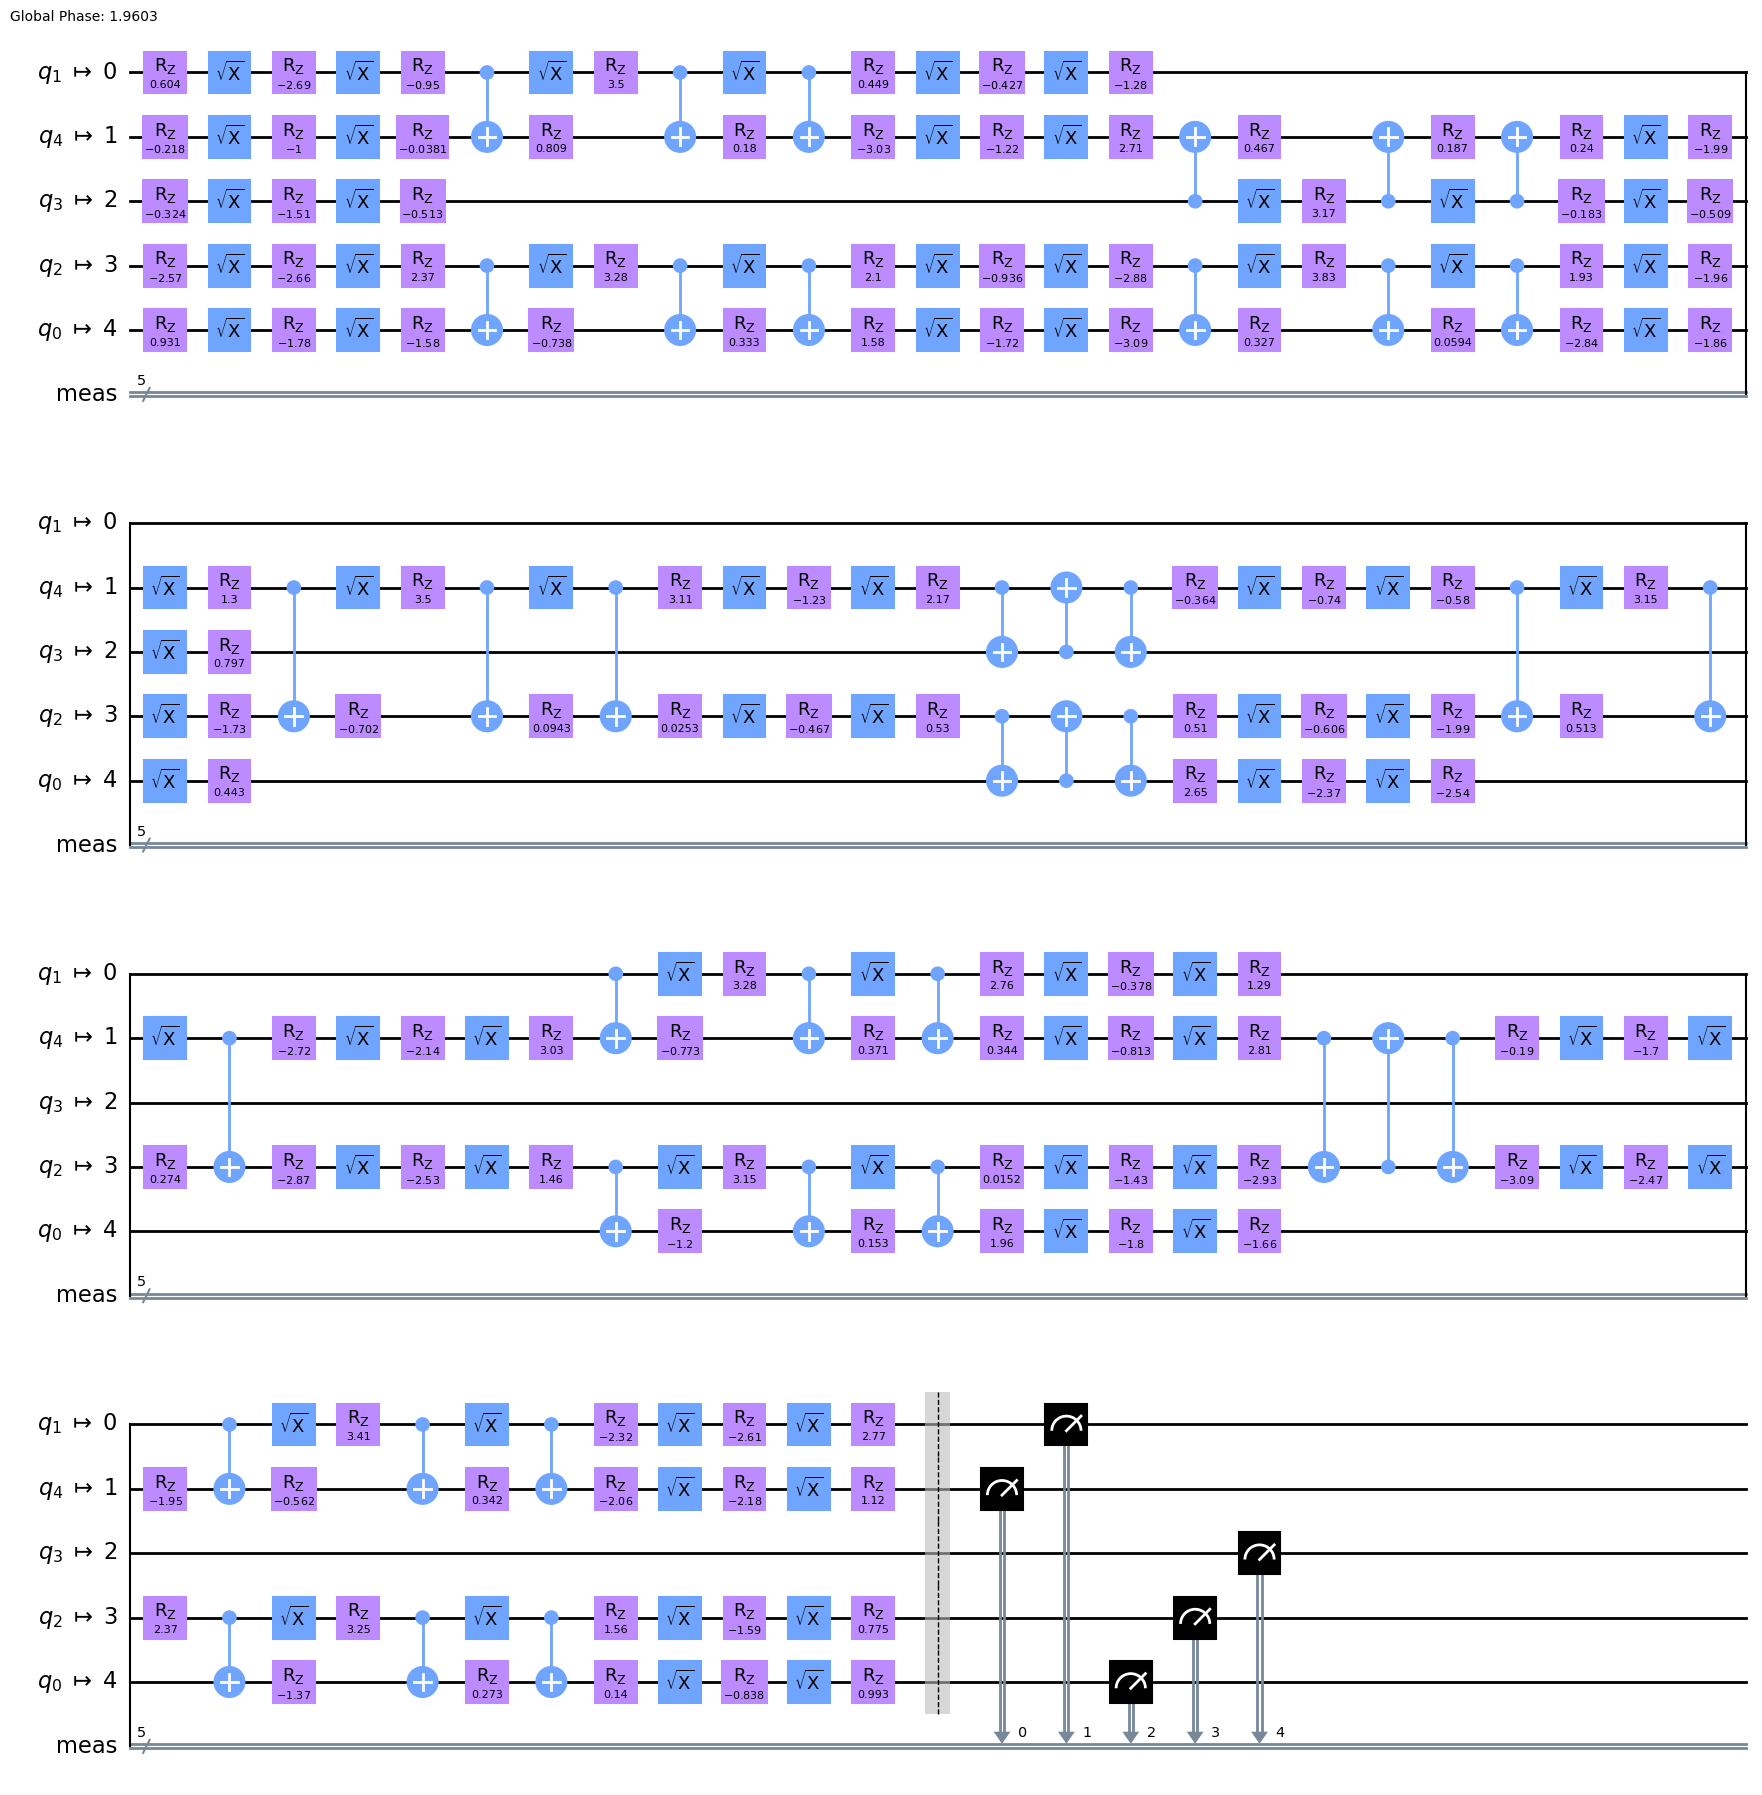

In [3]:
# prepare your circuit to run
from qiskit import IBMQ
 
# Get the API token in
# https://quantum-computing.ibm.com/
IBMQ.save_account("1fe4ce1b8edb6b3beeb02b9d17f39551a5cff261a545b1ee19bef888399da4bba828527b74bcd4c2b3b670445a8748a2df010606ec942d43dadcdc3b25322234")
 
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito')
 
optimized_circuit = qiskit.transpile(quantum_circuit, backend)
optimized_circuit.draw(output="mpl")

In [4]:
# run in real hardware
job = backend.run(optimized_circuit)
retrieved_job = backend.retrieve_job(job.job_id())
result = retrieved_job.result()
print(result.get_counts())

{'00000': 349, '00001': 93, '10000': 194, '10001': 109, '10010': 100, '10011': 60, '10100': 74, '10101': 65, '10110': 37, '10111': 74, '11000': 91, '11001': 98, '11010': 83, '11011': 63, '11100': 66, '11101': 134, '11110': 84, '11111': 59, '00010': 302, '00011': 148, '00100': 86, '00101': 104, '00110': 67, '00111': 156, '01000': 235, '01001': 155, '01010': 206, '01011': 115, '01100': 116, '01101': 181, '01110': 145, '01111': 151}
